<a href="https://colab.research.google.com/github/5655530/Moduchef_YoloV5/blob/main/YoloV5_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytube

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.8 MB/s eta 0:00:00


In [ ]:
!pip install youtube_dl

In [1]:
import torch
import numpy as np
import cv2
from time import time

In [2]:
class ObjectDetection:
    # YouTube 동영상에 YOLOv5 구현
    def __init__(self, url, out_file):
        self.file_path = '/content/sample_data/고기와 싸먹으면 정~말 맛있는 파프리카 무침! 입안에서 톡!! Bursts in Your Mouth! Paprika Muchim.mp4'
        self.model = self.load_model()
        self.classes = self.model.names
        self.out_file = out_file
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'

    def load_model(self):
        model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
        return model

    def score_frame(self, frame):
        self.model.to(self.device)
        frame = [frame]
        results = self.model(frame)
        labels, cord = results.xyxyn[0][:, -1].cpu().numpy(), results.xyxyn[0][:, :-1].cpu().numpy()
        return labels, cord

    def class_to_label(self, x):
        return self.classes[int(x)]

    def plot_boxes(self, results, frame):
        labels, cord = results
        n = len(labels)
        x_shape, y_shape = frame.shape[1], frame.shape[0]
        for i in range(n):
            row = cord[i]
            if row[4] >= 0.2:
                x1, y1, x2, y2 = int(row[0]*x_shape), int(row[1]*y_shape), int(row[2]*x_shape), int(row[3]*y_shape)
                bgr = (0, 255, 0)
                cv2.rectangle(frame, (x1, y1), (x2, y2), bgr, 2)
                cv2.putText(frame, self.class_to_label(labels[i]) + ': ' + str(x1) + ', ' + str(x2) + ', ' + str(y1) + ', ' + str(y2), (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.9, bgr, 2)
        return frame

    def __call__(self):
        player = cv2.VideoCapture(self.file_path)
        assert player.isOpened()
        x_shape = int(player.get(cv2.CAP_PROP_FRAME_WIDTH))
        y_shape = int(player.get(cv2.CAP_PROP_FRAME_HEIGHT))
        four_cc = cv2.VideoWriter_fourcc(*"MJPG")
        out = cv2.VideoWriter(self.out_file, four_cc, 20, (x_shape, y_shape))
        while True:
            start_time = time()
            ret, frame = player.read()
            if not ret:  # 동영상의 마지막에 도달하면 종료
                break
            results = self.score_frame(frame)
            frame = self.plot_boxes(results, frame)
            end_time = time()
            fps = 1/np.round(end_time - start_time, 3)
            print(f"Frames Per Second : {fps}")
            out.write(frame)
        player.release()
        out.release()


In [ ]:
Video = ObjectDetection("/content/sample_data/고기와 싸먹으면 정~말 맛있는 파프리카 무침! 입안에서 톡!! Bursts in Your Mouth! Paprika Muchim.mp4", "output_YOLOv5.avi")
Video()

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-10-23 Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Frames Per Second : 2.8328611898017
Frames Per Second : 3.90625
Frames Per Second : 3.9215686274509802
Frames Per Second : 3.731343283582089
Frames Per Second : 3.8022813688212924
Frames Per Second : 3.90625
Frames Per Second : 3.875968992248062
Frames Per Second : 3.8314176245210727
Frames Per Second : 3.663003663003663
Frames Per Second : 4.0
Frames Per Second : 3.8910505836575875
Frames Per Second : 3.937007874015748
Frames Per Second : 3.861003861003861
Frames Per Second : 4.081632653061225
Frames Per Second : 3.952569169960474
Frames Per Second : 3.846153846153846
Frames Per Second : 4.065040650406504
Frames Per Second : 4.0
Frames Per Second : 4.081632653061225
Frames Per Second : 3.676470588235294
Frames Per Second : 3.9682539682539684
Frames Per Second : 3.9215686274509802
Frames Per Second : 4.219409282700422
Frames Per Second : 3.773584905660377
Frames Per Second : 4.219409282700422
Frames Per Second : 3.9215686274509802
Frames Per Second : 4.184100418410042
Frames Per Second

In [3]:
Video = ObjectDetection("/content/sample_data/고기와 싸먹으면 정~말 맛있는 파프리카 무침! 입안에서 톡!! Bursts in Your Mouth! Paprika Muchim.mp4", "Fridge_YOLOv5.avi")
Video()

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
requirements: Ultralytics requirement ['gitpython>=3.1.30'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 22.4 MB/s et

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Frames Per Second : 66.66666666666667
Frames Per Second : 66.66666666666667
Frames Per Second : 66.66666666666667
Frames Per Second : 66.66666666666667
Frames Per Second : 66.66666666666667
Frames Per Second : 55.55555555555556
Frames Per Second : 66.66666666666667
Frames Per Second : 62.5
Frames Per Second : 66.66666666666667
Frames Per Second : 66.66666666666667
Frames Per Second : 66.66666666666667
Frames Per Second : 66.66666666666667
Frames Per Second : 71.42857142857143
Frames Per Second : 66.66666666666667
Frames Per Second : 66.66666666666667
Frames Per Second : 66.66666666666667
Frames Per Second : 71.42857142857143
Frames Per Second : 66.66666666666667
Frames Per Second : 66.66666666666667
Frames Per Second : 66.66666666666667
Frames Per Second : 66.66666666666667
Frames Per Second : 62.5
Frames Per Second : 66.66666666666667
Frames Per Second : 66.66666666666667
Frames Per Second : 66.66666666666667
Frames Per Second : 66.66666666666667
Fr

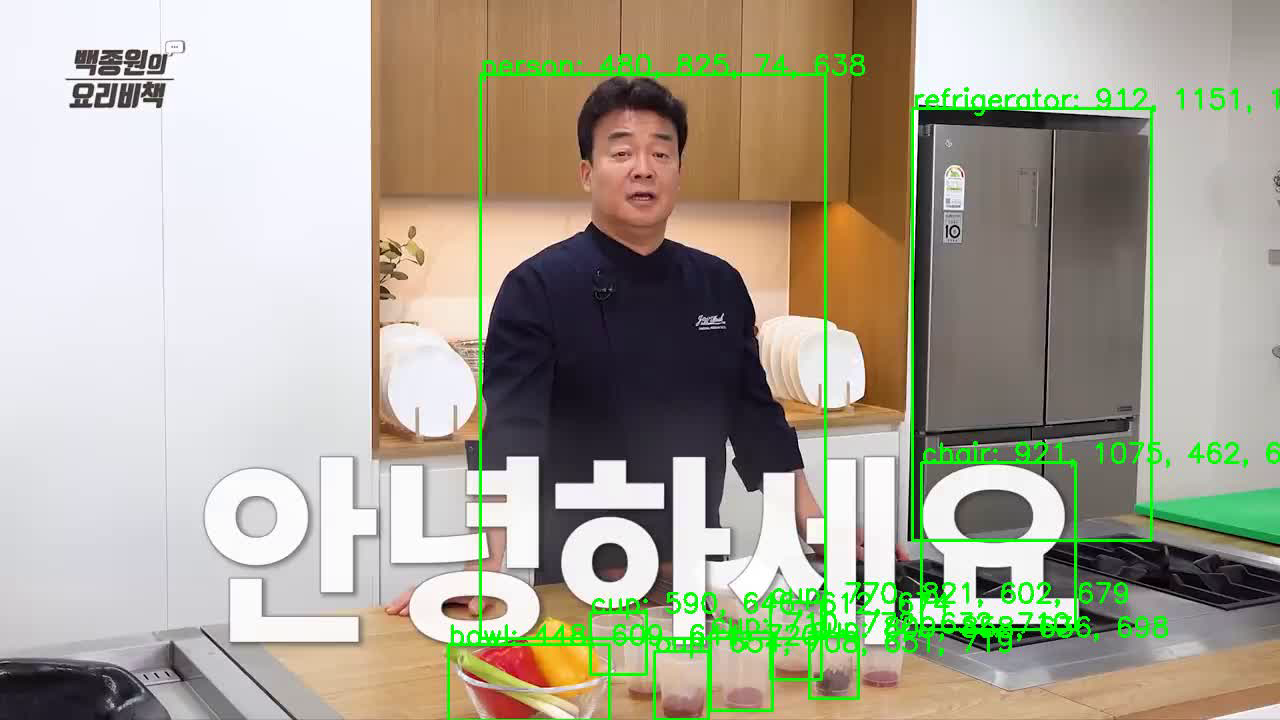

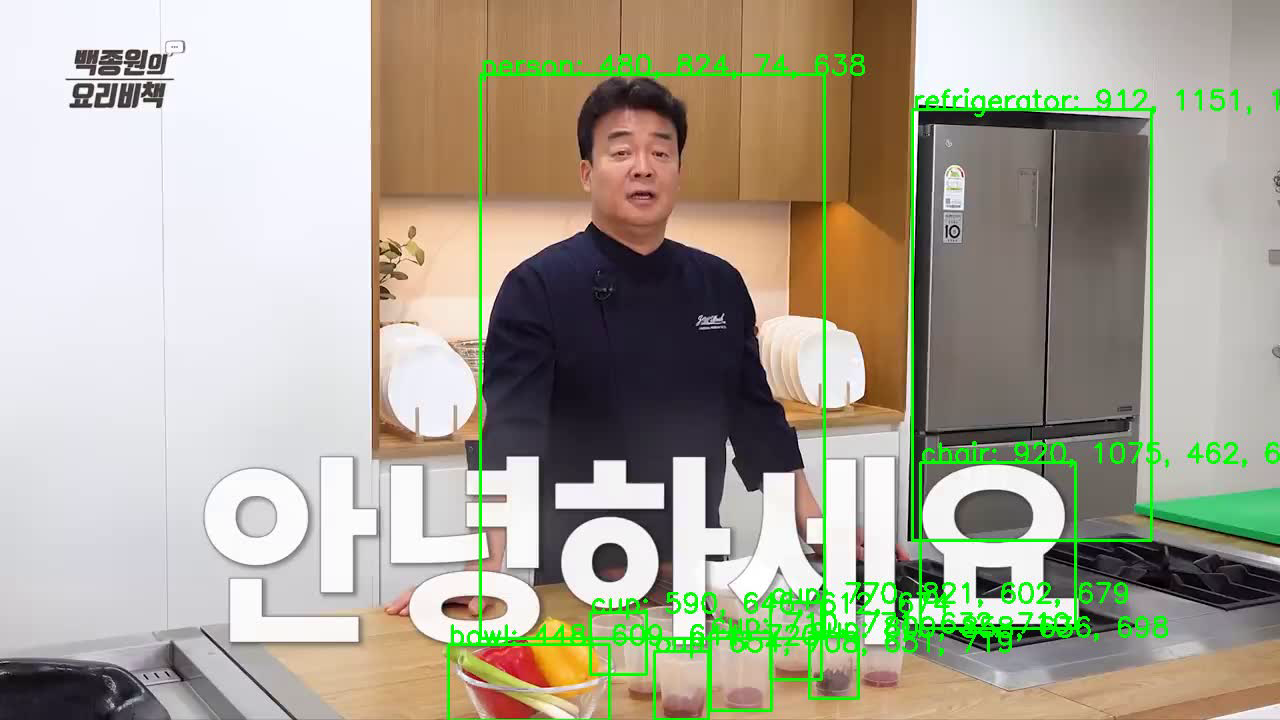

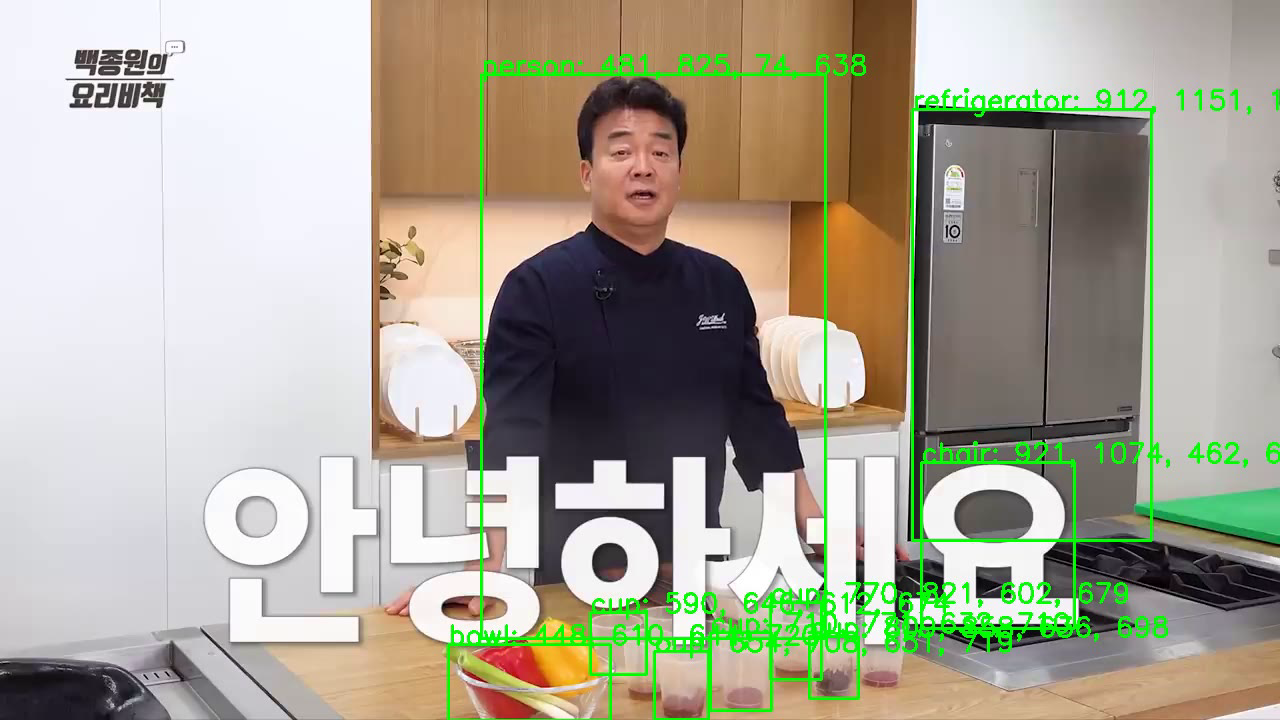

In [15]:
from google.colab.patches import cv2_imshow

def play_video_frames(file_path, num_frames= 3):
    cap = cv2.VideoCapture(file_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    frame_count = 0
    while frame_count < num_frames:
        ret, frame = cap.read()
        if not ret:
            break

        cv2_imshow(frame)  # Google Colab의 함수로 이미지 표시

        frame_count += 1
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()

# 비디오의 처음 10 프레임을 표시
play_video_frames("Fridge_YOLOv5.avi", 3)


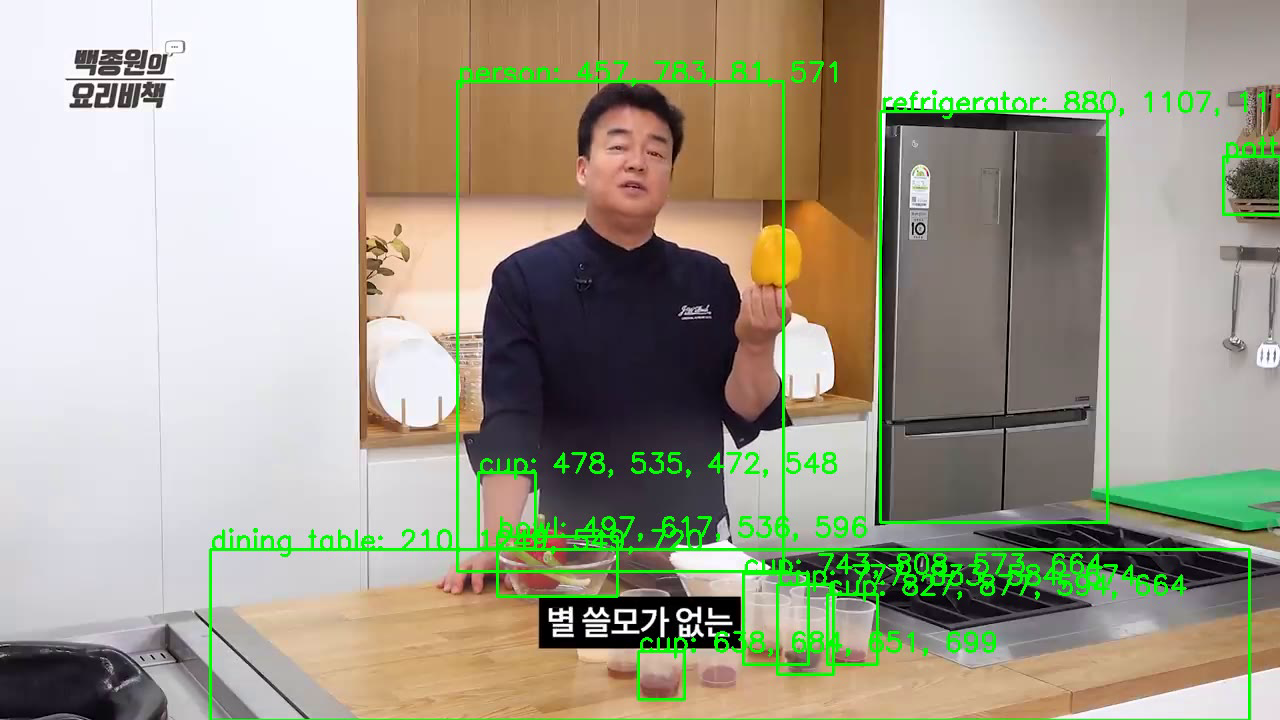

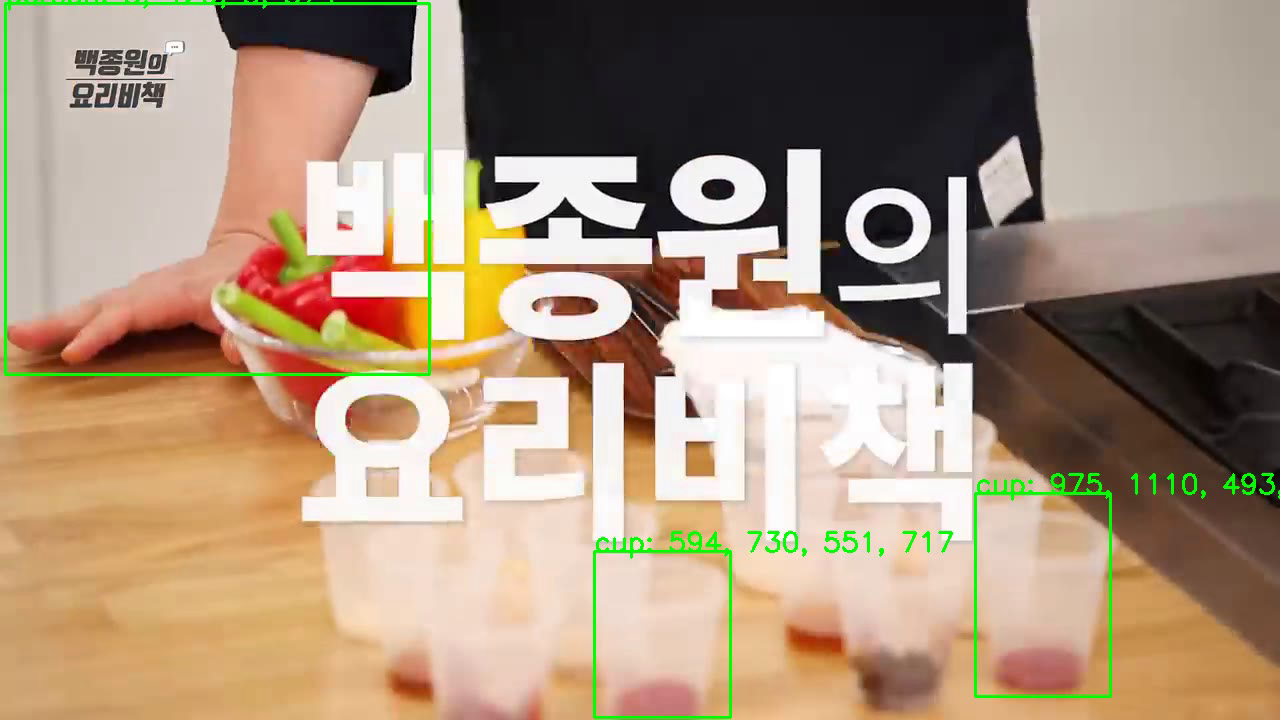

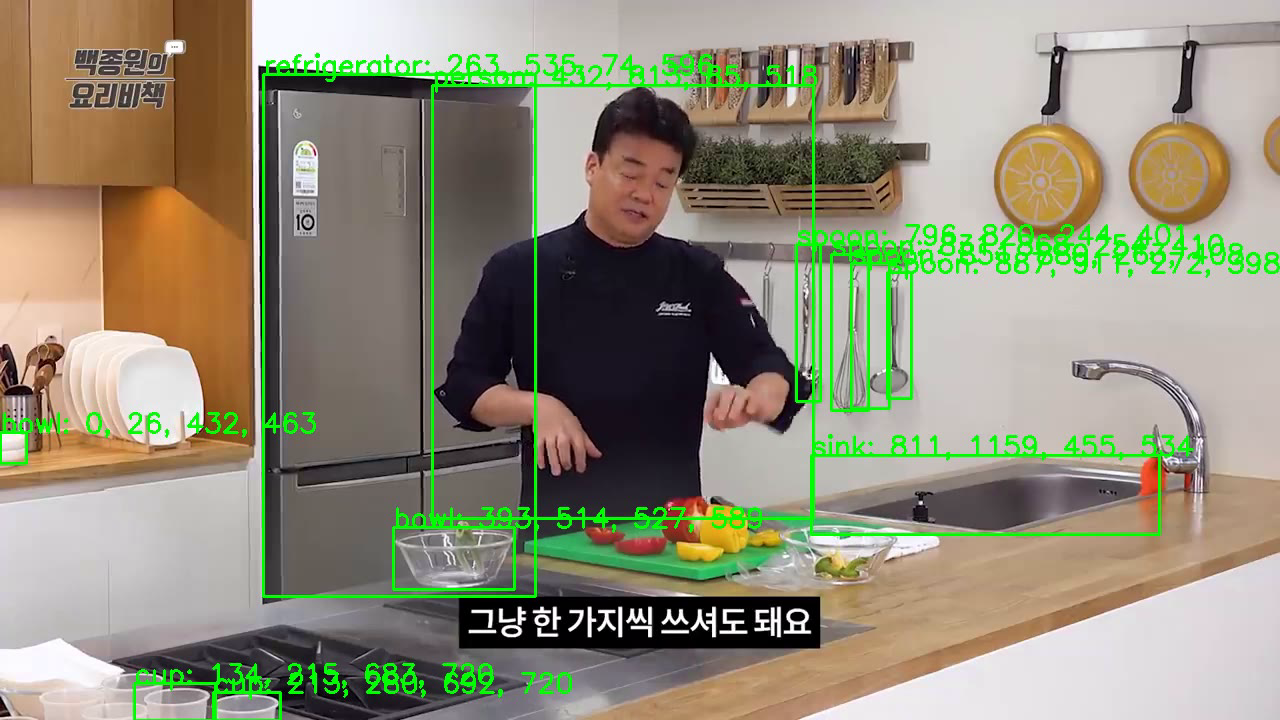

In [16]:
import random
from google.colab.patches import cv2_imshow

def play_random_frames(file_path, num_frames=3):
    cap = cv2.VideoCapture(file_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    # 총 프레임 수를 얻기
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # 총 프레임 수 범위 내에서 랜덤하게 프레임 번호들을 선택
    random_frames = random.sample(range(total_frames), num_frames)

    for frame_num in random_frames:
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
        ret, frame = cap.read()
        if not ret:
            continue

        cv2_imshow(frame)  # Google Colab의 함수로 이미지 표시

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()

# 랜덤으로 30 프레임을 표시
play_random_frames("Fridge_YOLOv5.avi", 3)



In [8]:
class ObjectDetection:
    # YouTube 동영상에 YOLOv5 구현
    def __init__(self, url, out_file):
        self.file_path = '/content/sample_data/고기와 싸먹으면 정~말 맛있는 파프리카 무침! 입안에서 톡!! Bursts in Your Mouth! Paprika Muchim.mp4'
        self.model = self.load_model()
        self.classes = self.model.names
        self.out_file = out_file
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'

    def load_model(self):
        model = torch.hub.load('ultralytics/yolov5', 'yolov5m', pretrained=True)
        return model

    def score_frame(self, frame):
        self.model.to(self.device)
        frame = [frame]
        results = self.model(frame)
        labels, cord = results.xyxyn[0][:, -1].cpu().numpy(), results.xyxyn[0][:, :-1].cpu().numpy()
        return labels, cord

    def class_to_label(self, x):
        return self.classes[int(x)]

    def plot_boxes(self, results, frame):
        labels, cord = results
        n = len(labels)
        x_shape, y_shape = frame.shape[1], frame.shape[0]
        for i in range(n):
            row = cord[i]
            if row[4] >= 0.2:
                x1, y1, x2, y2 = int(row[0]*x_shape), int(row[1]*y_shape), int(row[2]*x_shape), int(row[3]*y_shape)
                bgr = (0, 255, 0)
                cv2.rectangle(frame, (x1, y1), (x2, y2), bgr, 2)
                cv2.putText(frame, self.class_to_label(labels[i]) + ': ' + str(x1) + ', ' + str(x2) + ', ' + str(y1) + ', ' + str(y2), (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.9, bgr, 2)
        return frame

    def __call__(self):
        player = cv2.VideoCapture(self.file_path)
        assert player.isOpened()
        x_shape = int(player.get(cv2.CAP_PROP_FRAME_WIDTH))
        y_shape = int(player.get(cv2.CAP_PROP_FRAME_HEIGHT))
        four_cc = cv2.VideoWriter_fourcc(*"MJPG")
        out = cv2.VideoWriter(self.out_file, four_cc, 20, (x_shape, y_shape))
        while True:
            start_time = time()
            ret, frame = player.read()
            if not ret:  # 동영상의 마지막에 도달하면 종료
                break
            results = self.score_frame(frame)
            frame = self.plot_boxes(results, frame)
            end_time = time()
            fps = 1/np.round(end_time - start_time, 3)
            print(f"Frames Per Second : {fps}")
            out.write(frame)
        player.release()
        out.release()

In [9]:
Video = ObjectDetection("/content/sample_data/고기와 싸먹으면 정~말 맛있는 파프리카 무침! 입안에서 톡!! Bursts in Your Mouth! Paprika Muchim.mp4", "Fridge_m_YOLOv5.avi")
Video()

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-10-23 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 40.8M/40.8M [00:00<00:00, 53.0MB/s]

Fusing layers... 
YOLOv5m summary: 290 layers, 21172173 parameters, 0 gradients, 48.9 GFLOPs
Adding AutoShape... 


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Frames Per Second : 50.0
Frames Per Second : 47.61904761904761
Frames Per Second : 50.0
Frames Per Second : 47.61904761904761
Frames Per Second : 50.0
Frames Per Second : 43.47826086956522
Frames Per Second : 50.0
Frames Per Second : 50.0
Frames Per Second : 50.0
Frames Per Second : 47.61904761904761
Frames Per Second : 50.0
Frames Per Second : 50.0
Frames Per Second : 43.47826086956522
Frames Per Second : 50.0
Frames Per Second : 43.47826086956522
Frames Per Second : 50.0
Frames Per Second : 50.0
Frames Per Second : 50.0
Frames Per Second : 52.631578947368425
Frames Per Second : 52.631578947368425
Frames Per Second : 52.631578947368425
Frames Per Second : 52.631578947368425
Frames Per Second : 52.631578947368425
Frames Per Second : 50.0
Frames Per Second : 52.631578947368425
Frames Per Second : 50.0
Frames Per Second : 41.666666666666664
Frames Per Second : 50.0
Frames Per Second : 50.0
Frames Per Second : 52.631578947368425
Frames Per Second : 50.0

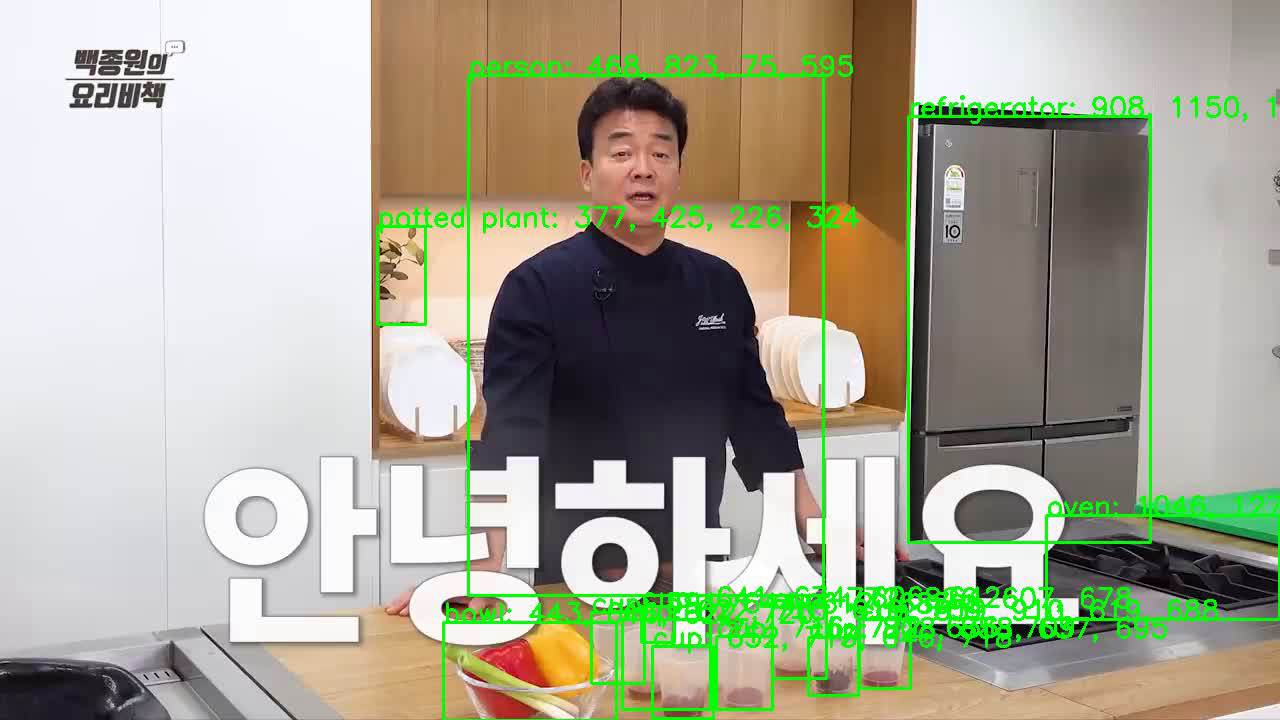

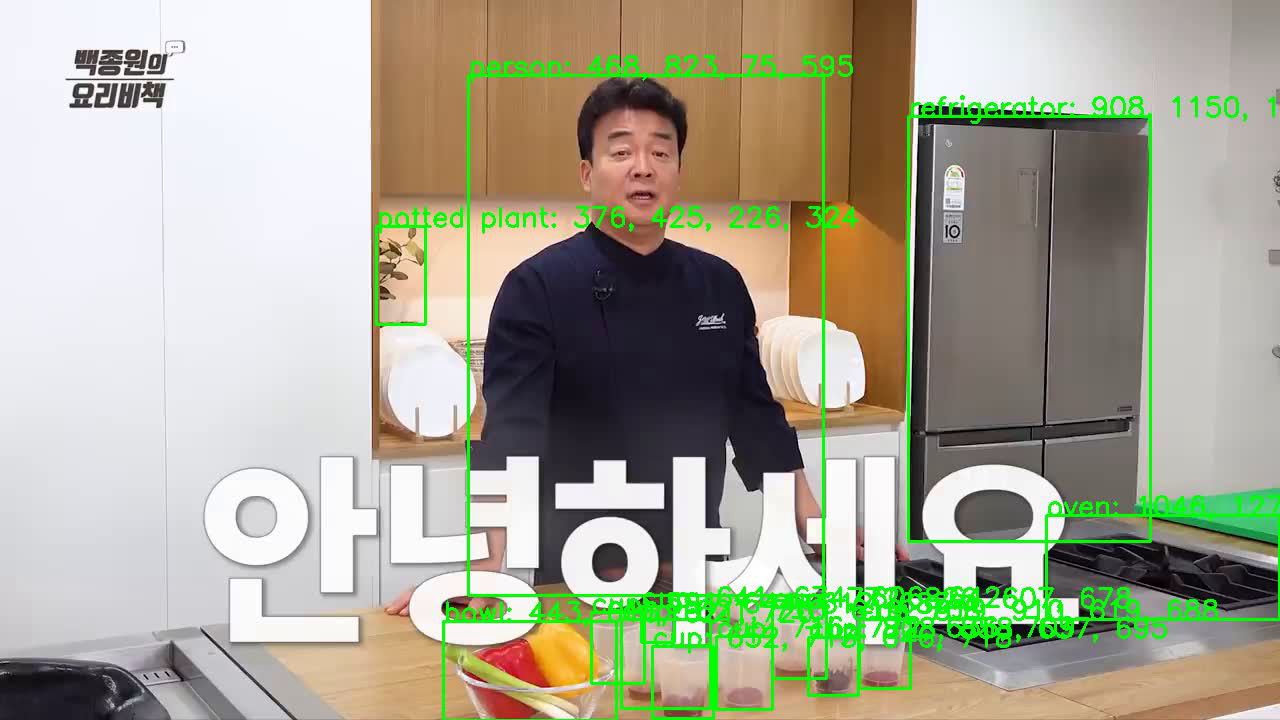

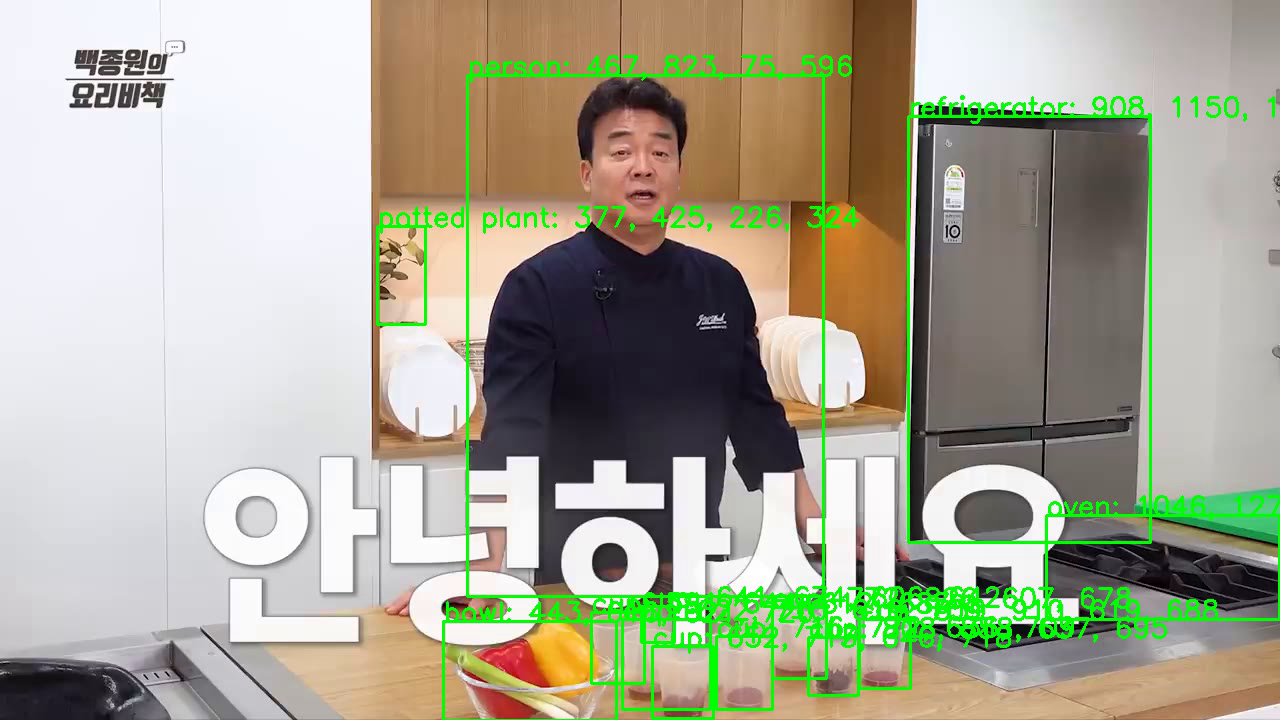

In [13]:
from google.colab.patches import cv2_imshow

def play_video_frames(file_path, num_frames=3):
    cap = cv2.VideoCapture(file_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    frame_count = 0
    while frame_count < num_frames:
        ret, frame = cap.read()
        if not ret:
            break

        cv2_imshow(frame)  # Google Colab의 함수로 이미지 표시

        frame_count += 1
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()

# 비디오의 처음 10 프레임을 표시
play_video_frames("Fridge_m_YOLOv5.avi", 3)


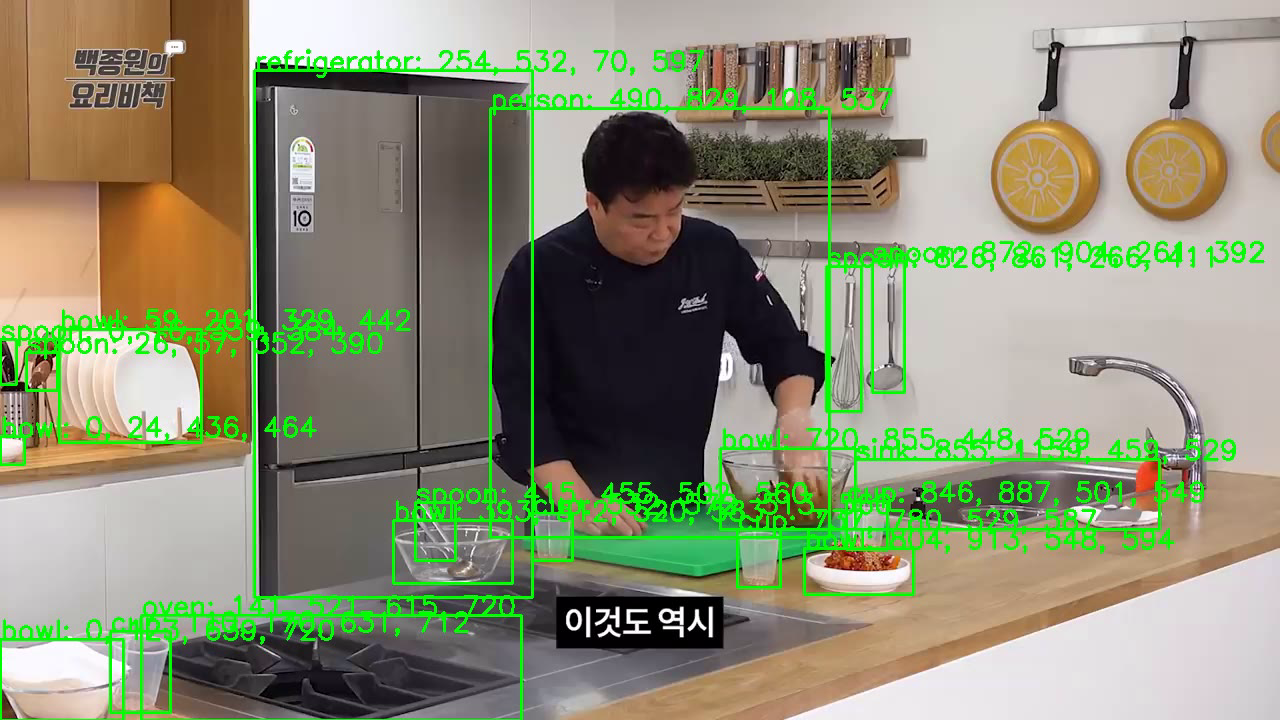

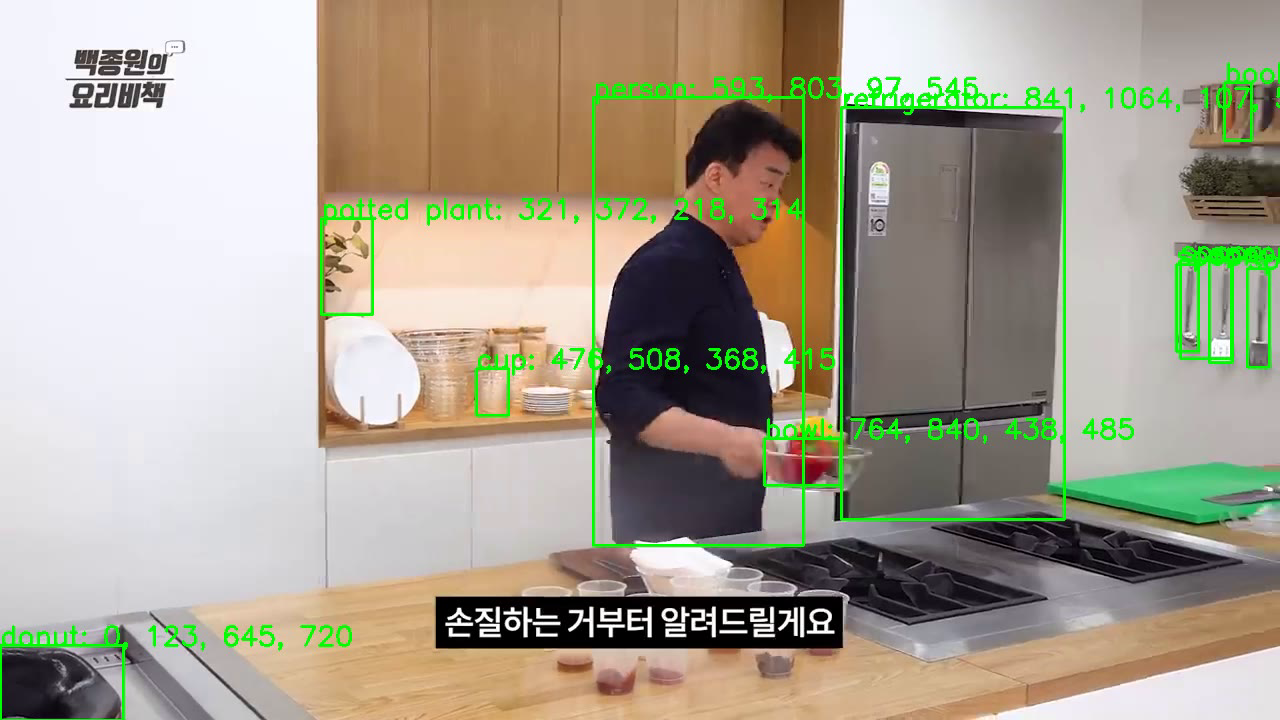

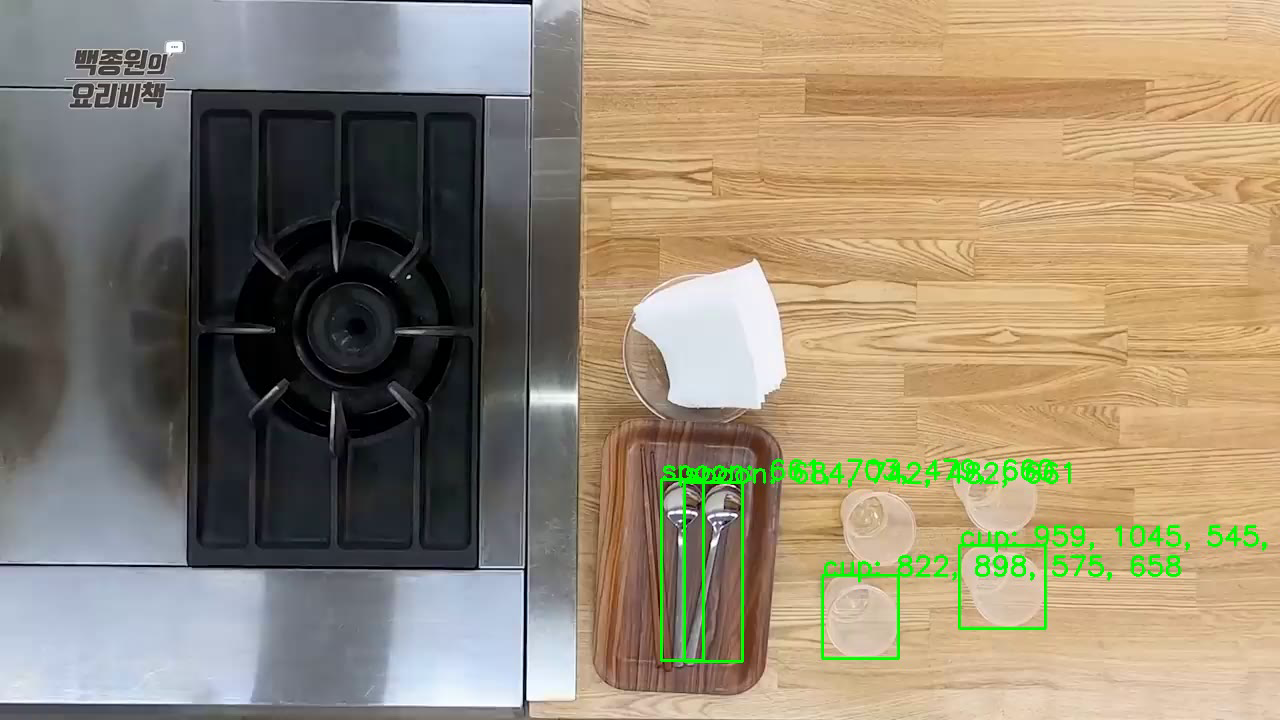

In [14]:
import random
from google.colab.patches import cv2_imshow

def play_random_frames(file_path, num_frames=3):
    cap = cv2.VideoCapture(file_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    # 총 프레임 수를 얻기
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # 총 프레임 수 범위 내에서 랜덤하게 프레임 번호들을 선택
    random_frames = random.sample(range(total_frames), num_frames)

    for frame_num in random_frames:
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
        ret, frame = cap.read()
        if not ret:
            continue

        cv2_imshow(frame)  # Google Colab의 함수로 이미지 표시

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()

# 랜덤으로 30 프레임을 표시
play_random_frames("Fridge_m_YOLOv5.avi", 3)